In [1]:
import numpy as np
import mne

def bandpass_filter(raw, low=0.5, high=40):
    raw.filter(l_freq=low, h_freq=high)
    return raw

Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MiB, data loaded>
Using matplotlib as 2D backend.


/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/1504148349.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


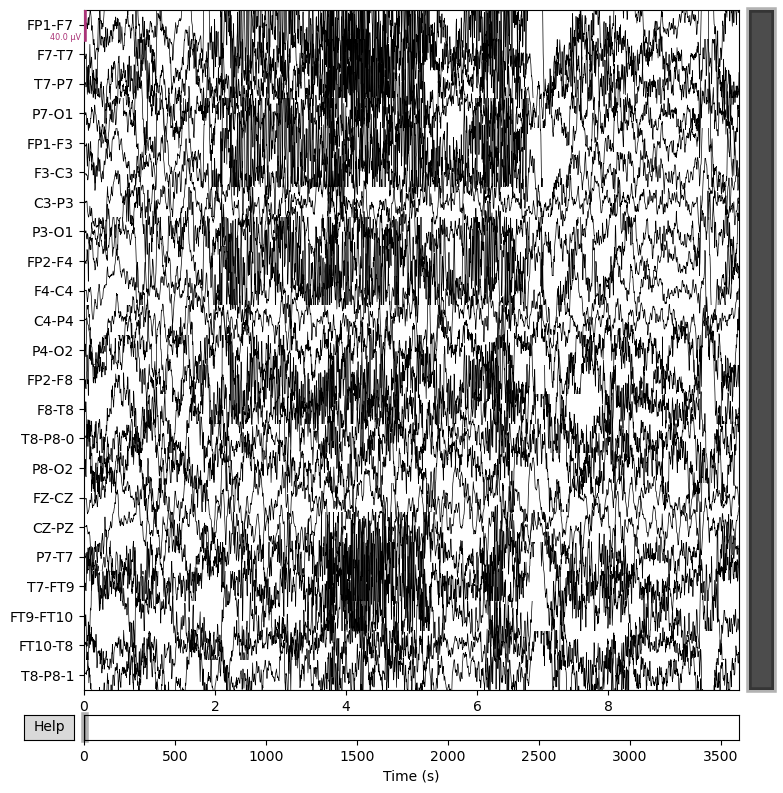

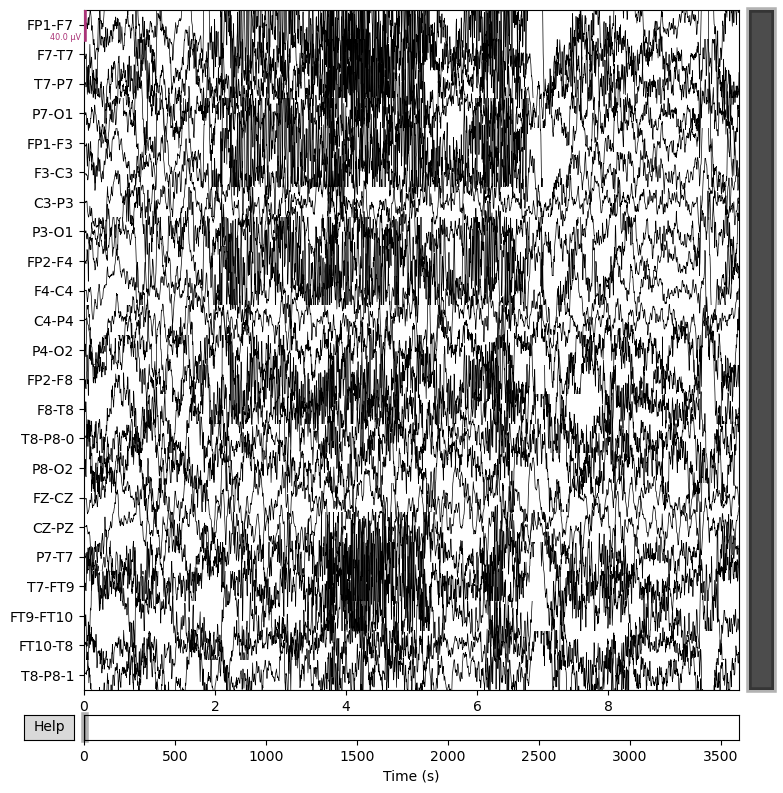

In [1]:
import mne
from pathlib import Path

data_dir = Path("../data_raw/chb_subset/chb01")
file_path = data_dir / "chb01_01.edf"   # change to another file if you like

raw = mne.io.read_raw_edf(file_path, preload=True)
print(raw)
raw.plot(n_channels=23, duration=10.0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



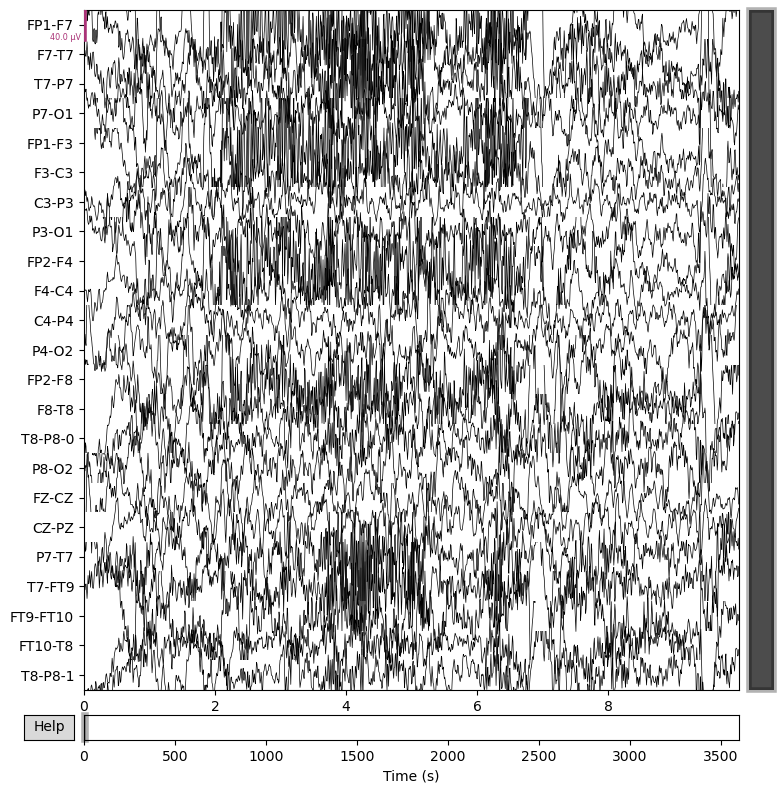

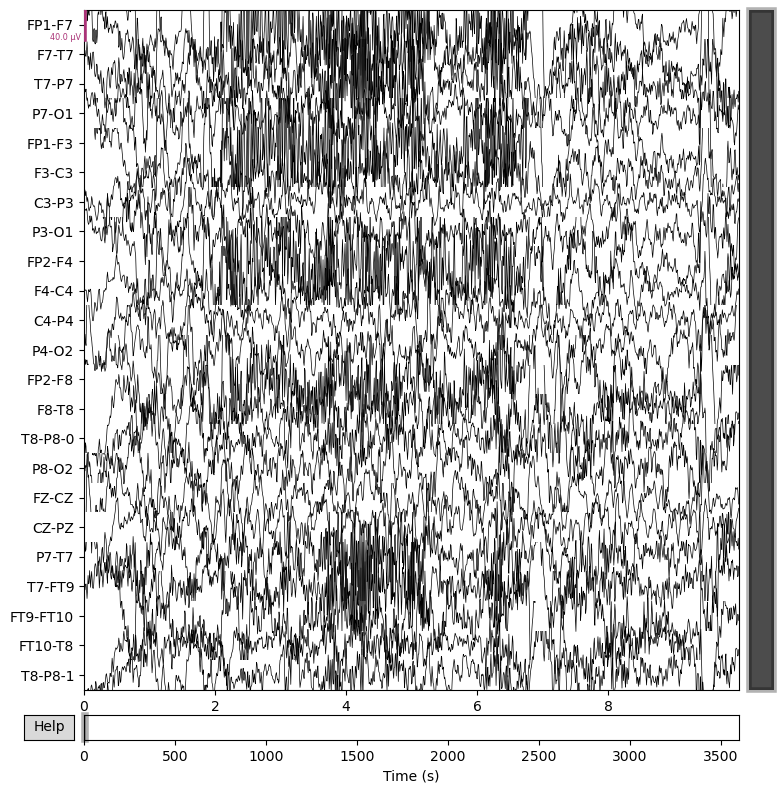

In [2]:
# 1. Set montage (optional, helps with interpretation)
raw.set_montage("standard_1020", on_missing='ignore')

# 2. Apply band-pass filter (commonly 1–40 Hz for seizure work)
raw_filt = raw.copy().filter(1., 40., fir_design="firwin")

raw_filt.plot(n_channels=23, duration=10)

In [3]:
raw_resampled = raw_filt.copy().resample(128)
raw_resampled

<RawEDF | chb01_01.edf, 23 x 460800 (3600.0 s), ~80.9 MiB, data loaded>

In [4]:
import numpy as np

sfreq = raw_resampled.info['sfreq']
win_sec = 5
win_samples = int(win_sec * sfreq)

data = raw_resampled.get_data()
n_samples = data.shape[1]
n_windows = n_samples // win_samples

windows = np.array([
    data[:, i*win_samples:(i+1)*win_samples]
    for i in range(n_windows)
])

windows.shape

(720, 23, 640)

In [5]:
raw.set_montage("standard_1020", on_missing='ignore')
raw_filt = raw.copy().filter(1., 40.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



In [6]:
raw_resampled = raw_filt.copy().resample(128)

In [7]:
import numpy as np

sfreq = raw_resampled.info['sfreq']
win_sec = 5
win_samples = int(win_sec * sfreq)

data = raw_resampled.get_data()
n_samples = data.shape[1]
n_windows = n_samples // win_samples

windows = np.array([
    data[:, i*win_samples:(i+1)*win_samples]
    for i in range(n_windows)
])

windows.shape

(720, 23, 640)

In [8]:
import mne
import numpy as np
from pathlib import Path

# Path to your subset
data_dir = Path("../data_raw/chb_subset/chb01")

file_path = data_dir / "chb01_01.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

print("Loaded raw:", raw)

Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Loaded raw: <RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MiB, data loaded>


/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/1751189186.py:9: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


In [9]:
# Remove powerline noise (50/60 Hz)
raw.notch_filter(freqs=[50, 60])

# Bandpass filter to keep EEG useful range
raw.filter(l_freq=1.0, h_freq=40.0)

print("Filtering done!")

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Filtering done!


In [10]:
import numpy as np

# 1) Get data from MNE Raw
data = raw.get_data()        # shape: (n_channels, n_samples)
sfreq = raw.info['sfreq']    # sampling frequency, e.g. 128 Hz

print("Data shape:", data.shape)
print("Sampling rate:", sfreq, "Hz")

# 2) Define window parameters
window_sec = 5.0
window_size = int(window_sec * sfreq)   # samples per window
step = window_size                      # non-overlapping

n_channels, n_samples = data.shape
n_windows = n_samples // step

print("Window size (samples):", window_size)
print("Number of full windows:", n_windows)

# 3) Build (n_windows, n_channels, window_size) array
windows = np.zeros((n_windows, n_channels, window_size), dtype=np.float32)

for i in range(n_windows):
    start = i * step
    end = start + window_size
    windows[i] = data[:, start:end]

print("windows.shape =", windows.shape)

Data shape: (23, 921600)
Sampling rate: 256.0 Hz
Window size (samples): 1280
Number of full windows: 720
windows.shape = (720, 23, 1280)


In [11]:
def extract_features_from_window(win):
    """
    win: shape (n_channels, window_size)
    returns: 1D feature vector length n_channels * 3
    """
    means = np.mean(win, axis=1)
    stds = np.std(win, axis=1)
    ptp = np.ptp(win, axis=1)   # max - min

    # concatenate: [means, stds, ptp] → shape (3 * n_channels,)
    return np.concatenate([means, stds, ptp], axis=0)

# Apply to all windows
n_windows, n_channels, window_size = windows.shape
n_features = n_channels * 3

X = np.zeros((n_windows, n_features), dtype=np.float32)

for i in range(n_windows):
    X[i] = extract_features_from_window(windows[i])

print("Feature matrix shape: ", X.shape)

Feature matrix shape:  (720, 69)


In [12]:
import os
from pathlib import Path

processed_dir = Path("../data_processed")
processed_dir.mkdir(exist_ok=True)

np.save(processed_dir / "chb01_01_features.npy", X)
print("Saved features to:", processed_dir / "chb01_01_features.npy")

Saved features to: ../data_processed/chb01_01_features.npy


In [13]:
from pathlib import Path
import numpy as np
import mne

# --- paths ---
data_dir = Path("../data_raw/chb_subset/chb01")
processed_dir = Path("../data_processed")
processed_dir.mkdir(exist_ok=True)

# list all EDF files
edf_files = sorted(data_dir.glob("*.edf"))
print("Found EDF files:", [f.name for f in edf_files])

def windows_to_features(windows):
    """Apply extract_features_from_window to each window."""
    n_windows, n_channels, window_size = windows.shape
    n_features = n_channels * 3   # mean, std, ptp
    X = np.zeros((n_windows, n_features), dtype=np.float32)

    for i in range(n_windows):
        X[i] = extract_features_from_window(windows[i])
    return X

for edf_path in edf_files:
    print("\nProcessing", edf_path.name)

    # 1) load
    raw = mne.io.read_raw_edf(edf_path, preload=True)

    # 2) filtering (copy same code you used before)
    raw.filter(1., 40.)  # or your band-stop + band-pass steps

    # 3) windowing (use the same function / code as before)
    windows = windows  # <-- replace this with your own windowing call
    # e.g. windows = make_windows(raw, win_sec=5, sfreq=256)

    # 4) features
    X = windows_to_features(windows)
    print("Feature matrix shape:", X.shape)

    # 5) save
    out_path = processed_dir / f"{edf_path.stem}_features.npy"
    np.save(out_path, X)
    print("Saved:", out_path)

Found EDF files: ['chb01_01.edf', 'chb01_02.edf', 'chb01_03.edf', 'chb01_04.edf', 'chb01_05.edf', 'chb01_06.edf', 'chb01_07.edf', 'chb01_08.edf']

Processing chb01_01.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_01_features.npy

Processing chb01_02.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz


/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_02_features.npy

Processing chb01_03.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_03_features.npy

Processing chb01_04.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_04_features.npy

Processing chb01_05.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_05_features.npy

Processing chb01_06.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_06_features.npy

Processing chb01_07.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_07_features.npy

Processing chb01_08.edf
Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 845055  =      0.000 ...  3300.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/968061225.py:28: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Feature matrix shape: (720, 69)
Saved: ../data_processed/chb01_08_features.npy


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# X is your feature matrix (720, 69)
# labels is your y vector (720,)

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, prob))

NameError: name 'labels' is not defined

In [15]:
import numpy as np

# Save processed feature matrix and labels
np.save("../data_processed/X.npy", X)
np.save("../data_processed/labels.npy", labels)

print("Saved X and labels!")

NameError: name 'labels' is not defined

In [16]:
import numpy as np
import mne
from pathlib import Path

# Load EDF file again
data_dir = Path("../data_raw/chb_subset/chb01")
file_path = data_dir / "chb01_01.edf"     # <-- or whichever file you're using

raw = mne.io.read_raw_edf(file_path, preload=True)

# Filter 1–40Hz
raw.filter(1, 40)

# Create 5-second windows
sfreq = int(raw.info["sfreq"])
window_size = 5 * sfreq
data = raw.get_data()
n_channels, n_samples = data.shape

n_windows = n_samples // window_size
windows = data[:, :n_windows * window_size].reshape(
    n_channels, n_windows, window_size
).transpose(1, 0, 2)

print("windows.shape =", windows.shape)   # should be (720, 23, 1280)


# LOAD SEIZURE LABELS
seizure_intervals = [
    (2996, 3036),
    (1467, 1494),
    (1732, 1772),
    (1015, 1066),
    (1720, 1810),
    (327, 420),
    (1862, 1963)
]

labels = np.zeros(n_windows, dtype=int)

for start, end in seizure_intervals:
    win_start = start // 5
    win_end   = end   // 5
    labels[win_start:win_end+1] = 1

print("labels.shape =", labels.shape)

Extracting EDF parameters from /Users/deepakreddy/epilepsy_project/data_raw/chb_subset/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/gj/g3mlkc4s68n3jy_tv4cn069w0000gn/T/ipykernel_67233/2162713583.py:9: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


windows.shape = (720, 23, 1280)
labels.shape = (720,)


In [17]:
X = np.zeros((n_windows, n_features))
for i in range(n_windows):
    X[i] = extract_features_from_window(windows[i])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

In [19]:
from pathlib import Path
import numpy as np

processed_dir = Path("../data_processed")

# (If you already have X and labels in memory, you can skip this reload part.)
# Otherwise, rebuild X and labels here, or re-run the cell that builds them.

print("X shape:", X.shape)        # should be something like (N_windows, 69)
print("labels shape:", labels.shape)  # (N_windows,)

np.save(processed_dir / "X.npy", X)
np.save(processed_dir / "labels.npy", labels)

print("Saved X and labels to:", processed_dir)

X shape: (720, 69)
labels shape: (720,)
Saved X and labels to: ../data_processed
